## Ejemplo 3: Scatterplots por categorías

### 1. Objetivos:
    - Aprender a generar e interpretar scatterplots por categorías
 
---
    
### 2. Desarrollo:

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/drive/MyDrive/BEDU/Remoto Datasets/Remoto athlete_olympic_events-clean.csv', index_col=0)

df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None


In [5]:
df_grouped = df.groupby('name')[['height', 'weight', 'sex', 'team', 'sport']].max()

In [7]:
china = df_grouped[df_grouped['team'] == 'China']

He aquí una gráfica de dispersión para observar la relación entre las variables 'weight' y 'height' de los atletas chinos que han participado en Olimpiadas:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


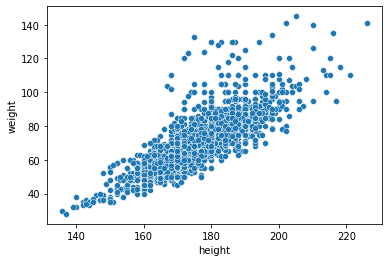

In [8]:
sns.scatterplot(china['height'], china['weight']);

Si queremos hacer una visualización comparativa entre los atletas hombres y mujeres de nuestro dataset de China, podemos entonces colorear nuestros puntos de acuerdo a la variable 'sex':

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


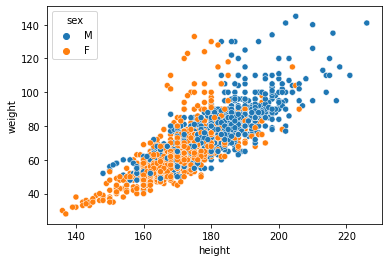

In [9]:
sns.scatterplot(china['height'], china['weight'], hue=china['sex']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


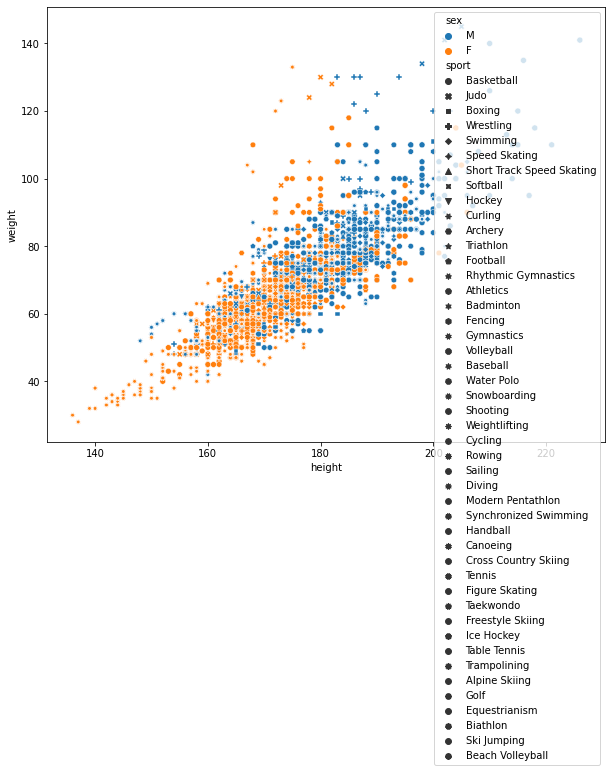

In [11]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()
sns.scatterplot(china['height'], china['weight'], hue=china['sex'], style=china['sport']);

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Esta gráfica nos hace ver con mucha claridad que sí hay una diferencia cuantificable entre los pesos y alturas de atletas masculinos y femeninos. También genera preguntas interesantes. Por ejemplo: ¿qué deporte realizan las atletas mujeres que tienen pesos cercanos al peso máximo?

In [ ]:
china[(china['sex'] == 'F') & (china['weight'] > 120)]

,height,weight,sex,team,sport
name,,,,,
Meng Suping,173.0,123.0,F,China,Weightlifting
Sun Fuming,178.0,124.0,F,China,Judo
Tong Wen,180.0,130.0,F,China,Judo
Yu Song,182.0,128.0,F,China,Judo
Zhou Lulu,175.0,133.0,F,China,Weightlifting


In [12]:
df_sport = china[china["sport"].isin(["Swimming","Basketball","Athletics"])]

¡Como era de esperarse, los pesos pesados entre las atletas mujeres de China hacen practican alterofilia y judo!

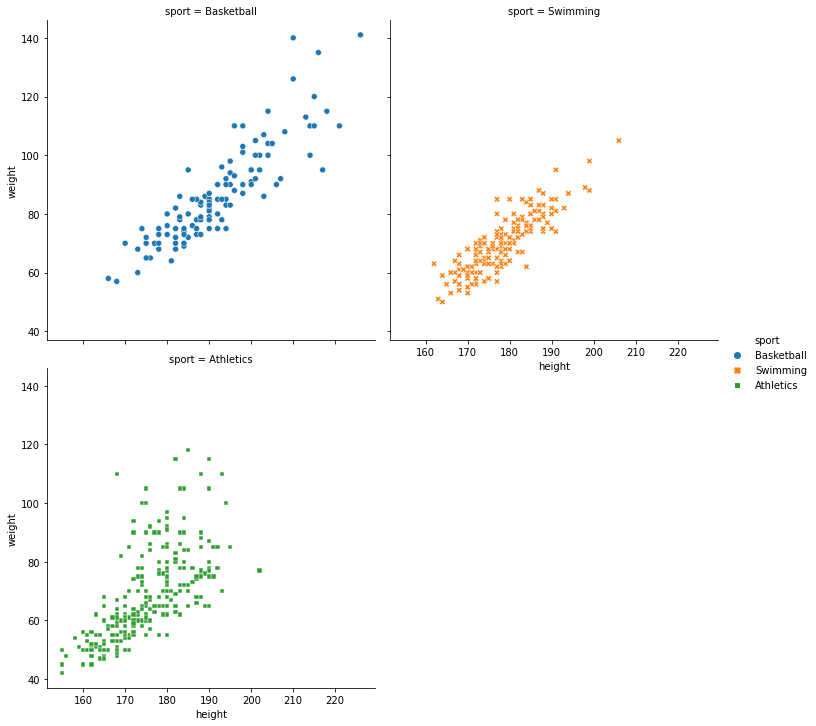

In [13]:
sns.relplot(data=df_sport, x='height', y="weight", kind="scatter", hue="sport", style="sport",
            col="sport", col_wrap=2)

In [16]:
df_vino = pd.read_csv("/content/drive/MyDrive/BEDU/Remoto Datasets/Remoto wine_quality_red-clean.csv", index_col=0)

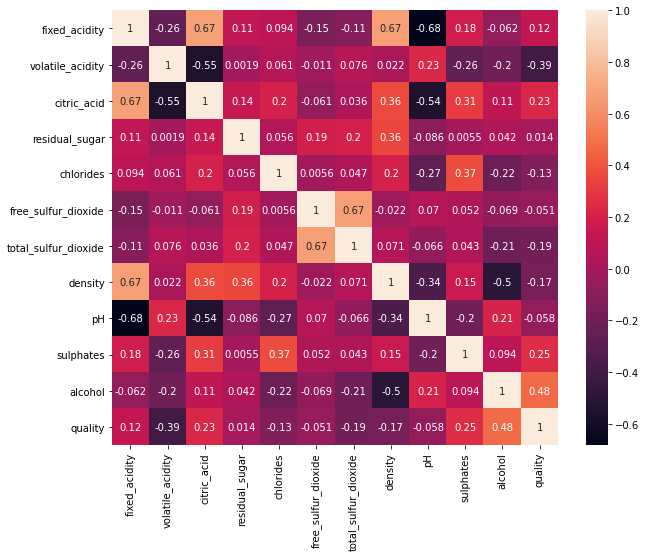

In [22]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(df_vino.corr(), annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


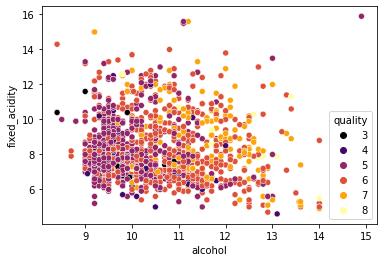

In [25]:
sns.scatterplot(df_vino['alcohol'], df_vino['fixed_acidity'], hue=df_vino['quality'], palette="inferno");